In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import re

## Vendedores - Seller

In [4]:
vendedores = pd.read_csv("data\olist_sellers_dataset.csv") #seller

# tabela de vendedores 3095 linhas  4 colunas ('seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state')

In [11]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
vendedores.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [13]:
vendedores.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [16]:
print("Nº total de vendedores exclusivos:",len((vendedores.seller_id).unique()))

Nº total de vendedores exclusivos: 3095


In [5]:
vendedores.to_csv('vendedores.csv')

In [90]:
vendedores.shape

(3095, 4)

## Pagamentos - payments

In [6]:
pagamentos = pd.read_csv("data\olist_order_payments_dataset.csv") #payments


# tabela de pagamentos 103886 linhas  5 colunas ('order_id', 'payment_sequential', 'payment_type','payment_installments', 'payment_value')

In [19]:
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
pagamentos.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
pagamentos.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [26]:
pagamentos.groupby('payment_type').size()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

In [7]:
pagamentos.loc[pagamentos['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [8]:
pagamentos.drop(index=pagamentos.loc[pagamentos['payment_type']=='not_defined'].index, inplace=True)

In [53]:
pagamentos['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

In [9]:
pagamentos.to_csv('pagamentos.csv')

In [89]:
pagamentos.shape

(103883, 5)

## Clientes - customers

In [10]:
clientes = pd.read_csv("data\olist_customers_dataset.csv") #customers

# tabela de clientes 99441 linhas  5 colunas ('customer_id', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state')

In [77]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [78]:
clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [79]:
clientes.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [11]:
clientes.to_csv('clientes.csv')

### Cidade

In [80]:
clientes.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [81]:
len(clientes.customer_city.unique())

4119

### Estado

In [82]:
clientes.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [83]:
len(clientes.customer_state.unique())

27

In [84]:
clientes.groupby('customer_city').count()['customer_id'].reset_index()

,customer_city,customer_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


In [29]:
itens = pd.read_csv("Data/itens.csv") 
ordens = pd.read_csv("Data/ordens.csv")
produtos = pd.read_csv("Data/produtos.csv")
geolocal = pd.read_csv("Data/geolocal.csv")
clientes = pd.read_csv("Data/clientes.csv")
avaliacoes = pd.read_csv('Data/avaliacoes.csv')
vendedores = pd.read_csv("Data/vendedores.csv")
pagamentos = pd.read_csv("Data/pagamentos.csv")

In [14]:
ordens['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [17]:
avaliacoes.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'review_id', 'order_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [19]:
avaliacoes['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [32]:
df.merge(vendedores, on='seller_id')

,Unnamed: 0_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Unnamed: 0_y,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0_x,seller_zip_code_prefix_x,seller_city_x,seller_state_x,Unnamed: 0_y,seller_zip_code_prefix_y,seller_city_y,seller_state_y
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,513,27277,volta redonda,SP,513,27277,volta redonda,SP
1,660,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,73287,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-25 14:35:11,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08,513,27277,volta redonda,SP,513,27277,volta redonda,SP
2,669,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,16173,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-10 12:30:15,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08,513,27277,volta redonda,SP,513,27277,volta redonda,SP
3,1295,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,3687,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-03 10:35:11,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25,513,27277,volta redonda,SP,513,27277,volta redonda,SP
4,5376,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,21044,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25,513,27277,volta redonda,SP,513,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,111812,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,22234,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,2017-02-24 22:42:22,2017-03-04 11:58:57,2017-03-14 16:17:59,2017-03-21,2957,14402,franca,SP,2957,14402,franca,SP
112646,111998,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,31620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04,2705,82620,curitiba,PR,2705,82620,curitiba,PR
112647,112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,28326,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,2916,86026,londrina,PR,2916,86026,londrina,PR
112648,112417,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,60088,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:29,2018-04-20 17:48:39,2018-04-30,2507,3124,sao paulo,SP,2507,3124,sao paulo,SP


In [31]:
pd.merge(ordens,pagamentos, on='order_id')

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0_y,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10770,1,credit_card,1,18.12
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,44246,3,voucher,1,2.00


In [33]:
df.merge(clientes, on='customer_id')

,Unnamed: 0_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Unnamed: 0_y,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0_x,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,513,27277,volta redonda,SP,65557,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,660,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,73287,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-25 14:35:11,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08,513,27277,volta redonda,SP,54370,f81c042ed0162a51b90372c233b4fbad,25240,duque de caxias,RJ
2,669,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,16173,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-10 12:30:15,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08,513,27277,volta redonda,SP,78523,921fa6982e780da7d9e0bb6ca11b380c,93010,sao leopoldo,RS
3,1295,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,3687,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-03 10:35:11,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25,513,27277,volta redonda,SP,2084,d46eb9ba6d6b75c1dac85b91911fc9c2,3560,sao paulo,SP
4,5376,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,21044,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25,513,27277,volta redonda,SP,12002,c082f4437360e3466068035e94a3345b,18540,porto feliz,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,111812,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,22234,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,2017-02-24 22:42:22,2017-03-04 11:58:57,2017-03-14 16:17:59,2017-03-21,2957,14402,franca,SP,89450,4d34eb7a11a201d8a2317a791adbcb29,23812,itaguai,RJ
112646,111998,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,31620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04,2705,82620,curitiba,PR,45692,52a953541861bbb4b79b39df24e00243,13485,limeira,SP
112647,112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,28326,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,2916,86026,londrina,PR,21171,459bef486812aa25204be022145caa62,29066,vitoria,ES
112648,112417,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,60088,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:29,2018-04-20 17:48:39,2018-04-30,2507,3124,sao paulo,SP,51136,ddb2249e0316d365ceae561c0f011bce,12280,cacapava,SP


In [34]:
df.merge(itens, on='order_id')

,Unnamed: 0_x,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,Unnamed: 0_y,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0_x,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,order_item_id_y,product_id_y,seller_id_y,shipping_limit_date_y,price_y,freight_value_y
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,513,27277,volta redonda,SP,0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,660,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,73287,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-25 14:35:11,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08,513,27277,volta redonda,SP,660,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94
2,669,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,16173,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-10 12:30:15,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08,513,27277,volta redonda,SP,669,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17
3,1295,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,3687,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-03 10:35:11,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25,513,27277,volta redonda,SP,1295,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16
4,5376,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,21044,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25,513,27277,volta redonda,SP,5376,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157217,112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,28326,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,2916,86026,londrina,PR,112233,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
157218,112417,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,60088,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:29,2018-04-20 17:48:39,2018-04-30,2507,3124,sao paulo,SP,112417,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44
157219,112417,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,60088,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:29,2018-04-20 17:48:39,2018-04-30,2507,3124,sao paulo,SP,112418,2,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44
157220,112418,ff701a7c869ad21de22a6994237c8a00,2,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,60088,8f6

## Avaliações

In [9]:
avaliacoes = pd.read_csv('Data/avaliacoes.csv') # reviews

In [10]:
avaliacoes.shape

(99224, 7)

In [6]:
avaliacoes.isnull().sum()

Unnamed: 0.1               0
Unnamed: 0                 0
review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [11]:
avaliacoes.drop_duplicates(inplace=True)

In [12]:
avaliacoes.shape

(99224, 7)

In [ ]:
df = pd.merge(ordens,pagamentos, on='order_id')
df = df.merge(clientes, on='customer_id')
df = df.merge(itens, on='order_id')
df = df.merge(produtos, on='product_id')
df = df.merge(produtos, on='product_category_name')
df = df.merge(avaliacoes, on='order_id')
df = df.merge(vendedores, on='seller_id')

In [36]:
ordens['order_purchase_year'] = ordens['order_purchase_timestamp'].apply(lambda x: x.year)
ordens['order_purchase_month'] = ordens['order_purchase_timestamp'].apply(lambda x: x.month)
ordens['order_purchase_month_name'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%b')if x==x else x )
ordens['order_purchase_year_month'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y.%m')if x==x else x )
ordens['order_purchase_date'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y,%m,%d')if x==x else x )

# GETTING VALUES FOR PURCHASE DAY, DAY OF WEEK, AND DAY NAME
ordens['order_purchase_day'] = ordens['order_purchase_timestamp'].apply(lambda x: x.day)
ordens['order_purchase_dayofweek'] = ordens['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
ordens['order_purchase_dayofweek_name'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%a')if x==x else x )

# GETTING VALUES FOR SPECIFIC TIME OF A DAY 
ordens['order_purchase_hour'] = ordens['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
ordens['order_purchase_time_day'] = pd.cut(ordens['order_purchase_hour'], hours_bins, labels=hours_labels)
ordens[:5]

AttributeError: 'str' object has no attribute 'year'

In [37]:
ordens['order_purchase_timestamp']

0        2017-10-02 10:56:33
1        2018-07-24 20:41:37
2        2018-08-08 08:38:49
3        2017-11-18 19:28:06
4        2018-02-13 21:18:39
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 12:58:58
99438    2017-08-27 14:46:43
99439    2018-01-08 21:28:27
99440    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: object

In [40]:
ordens.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
order_delivered_customer_date_y


In [ ]:
order_estimated_delivery_date_y


## Novo data frame unifica

In [2]:
df1 = pd.read_csv('Data/df.csv')

In [3]:
df1.head()

,Unnamed: 0,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,review_id,review_score,review_creation_date,review_answer_timestamp
0,0,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.00,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.00,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59
2,2,8e6d7754bc7e0f22c96d255ebda59eba,12233.0,sao jose dos campos,SP,a548910a1c6147796b98fdf73dbeba33,1.0,be0dbdc3d67d55727a65d4cd696ca73c,2018-03-06 12:48:39,79.79,...,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,80e641a11e56f04c1ad469d5645fdfde,5,2018-03-10 00:00:00,2018-03-11 03:05:13
3,3,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG,f9e4b658b201a9f2ecdecbb34bed034b,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,2018-02-08 10:31:15,149.00,...,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,228ce5500dc1d8e020d8d1322874b6f0,5,2018-02-17 00:00:00,2018-02-18 14:36:24
4,4,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG,658677c97b385a9be170737859d3511b,1.0,52c80cedd4e90108bf4fa6a206ef6b03,2017-04-13 17:55:19,179.99,...,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,e64fb393e7b32834bb789ff8bb30750e,5,2017-04-21 00:00:00,2017-04-21 22:02:06


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       113131 non-null  int64  
 1   seller_id                        112372 non-null  object 
 2   seller_zip_code_prefix           112372 non-null  float64
 3   seller_city                      112372 non-null  object 
 4   seller_state                     112372 non-null  object 
 5   order_id                         113131 non-null  object 
 6   order_item_id                    112372 non-null  float64
 7   product_id                       112372 non-null  object 
 8   shipping_limit_date              112372 non-null  object 
 9   price                            112372 non-null  float64
 10  freight_value                    112372 non-null  float64
 11  customer_id_x                    113131 non-null  object 
 12  or

In [ ]:
df1['order_delivered_carrier_date_y']

In [ ]:
df1['order_estimated_delivery_date_y']

In [ ]:
times_cols = ['order_estimated_delivery_date_y', 'order_delivered_customer_date_y']
for col in times_cols:
    df1[col] = pd.to_datetime(df1[col])

In [ ]:
df1['order_estimated_delivery_date_y']

In [ ]:
import datetime

In [ ]:
df1.head(2)

## Diferença entre dias

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Unnamed: 0                       113131 non-null  int64         
 1   seller_id                        112372 non-null  object        
 2   seller_zip_code_prefix           112372 non-null  float64       
 3   seller_city                      112372 non-null  object        
 4   seller_state                     112372 non-null  object        
 5   order_id                         113131 non-null  object        
 6   order_item_id                    112372 non-null  float64       
 7   product_id                       112372 non-null  object        
 8   shipping_limit_date              112372 non-null  object        
 9   price                            112372 non-null  float64       
 10  freight_value                    112372 non-

In [79]:
df1.head()

,Unnamed: 0,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,review_id,review_score,review_creation_date,review_answer_timestamp
0,0,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.00,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.00,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59
2,2,8e6d7754bc7e0f22c96d255ebda59eba,12233.0,sao jose dos campos,SP,a548910a1c6147796b98fdf73dbeba33,1.0,be0dbdc3d67d55727a65d4cd696ca73c,2018-03-06 12:48:39,79.79,...,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,80e641a11e56f04c1ad469d5645fdfde,5,2018-03-10 00:00:00,2018-03-11 03:05:13
3,3,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG,f9e4b658b201a9f2ecdecbb34bed034b,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,2018-02-08 10:31:15,149.00,...,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,228ce5500dc1d8e020d8d1322874b6f0,5,2018-02-17 00:00:00,2018-02-18 14:36:24
4,4,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG,658677c97b385a9be170737859d3511b,1.0,52c80cedd4e90108bf4fa6a206ef6b03,2017-04-13 17:55:19,179.99,...,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,e64fb393e7b32834bb789ff8bb30750e,5,2017-04-21 00:00:00,2017-04-21 22:02:06


In [ ]:
 df1['antecipacao_entrega']= df1['order_estimated_delivery_date_y'] - df1['order_delivered_customer_date_y']

In [ ]:
 df1['antecipacao_entrega']

<AxesSubplot:>

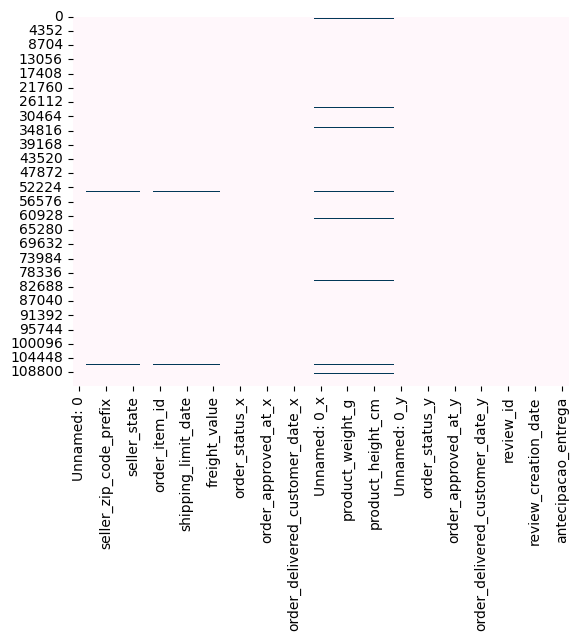

In [98]:
import seaborn as sns
sns.heatmap(df1.isnull(), cbar=False, cmap='PuBu')

In [ ]:
df1.corr()

## Análise exploratória

In [ ]:
df1 = pd.read_csv('Data/df.csv')

In [3]:
df1.head(2)

,Unnamed: 0,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,review_id,review_score,review_creation_date,review_answer_timestamp
0,0,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.0,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.0,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59


In [ ]:
print("Number of rows after merging:",len(df1))
print("Number of columns after merging:",len(df1.columns))

In [ ]:
df1.isnull().sum()

In [ ]:
times_cols = ['order_estimated_delivery_date_y', 'order_delivered_customer_date_y']
for col in times_cols:
    df1[col] = pd.to_datetime(df1[col])


In [ ]:
df1['antecipacao_entrega']= df1['order_estimated_delivery_date_y'] - df1['order_delivered_customer_date_y']

In [ ]:
df1['antecipacao_entrega'] = df1['antecipacao_entrega'].dt.days

In [ ]:
df_value = df1.groupby('seller_id', as_index=False)['review_score'].std()

In [ ]:
df3 = pd.DataFrame(df1['seller_id'].value_counts()).merge(df_value, left_index=True, right_on='seller_id')

In [ ]:
df3.loc[df3['seller_id_x']>=10]

In [ ]:
df3.loc[df3['seller_id_x']>=250].plot.scatter(x='review_score', y='seller_id_x')

In [ ]:
df1.loc[df1['seller_id']=='5b2e94f2c22b39ccc24d34ad0f669672','review_score'].plot.hist()

In [26]:
df1.columns

Index(['Unnamed: 0', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'order_id', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'Unnamed: 0_x',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'Unnamed: 0_y',
       'customer_id_y', 'order_status_y', 'order_purchase_timestamp_y',
       'order_approved_at_y', 'order_delivered_carrier_date_y',
       'order_delivered_customer_date_y', 'order_estimated_delivery_date_y',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'antecipacao_entrega'],
      dtype='object')

In [ ]:
df1['product_weight_g'].fillna(df1['product_weight_g'].median(),inplace=True)
df1['product_length_cm'].fillna(df1['product_length_cm'].median(),inplace=True)
df1['product_height_cm'].fillna(df1['product_height_cm'].median(),inplace=True)
df1['product_width_cm'].fillna(df1['product_width_cm'].median(),inplace=True)

In [ ]:
df1.isnull().sum()

In [ ]:
df1.review_score.value_counts()

In [ ]:
corr_matrix = df1.corr()

In [ ]:
corr_matrix["review_score"].sort_values(ascending=False)

In [ ]:
corr_matrix["antecipacao_entrega"].sort_values(ascending=False)

## Verificando IDs unicos

In [ ]:
print("Número total de seller_id unico:",len((df1.seller_id).unique()))
print("Número total de product_id unico:",len((df1.product_id).unique()))
print("Número total de customer_id_x unico:",len((df1.customer_id_x).unique()))

## Gráficos

In [ ]:
sns.pairplot(df1[['seller_id', 'antecipacao_entrega']])
plt.show()

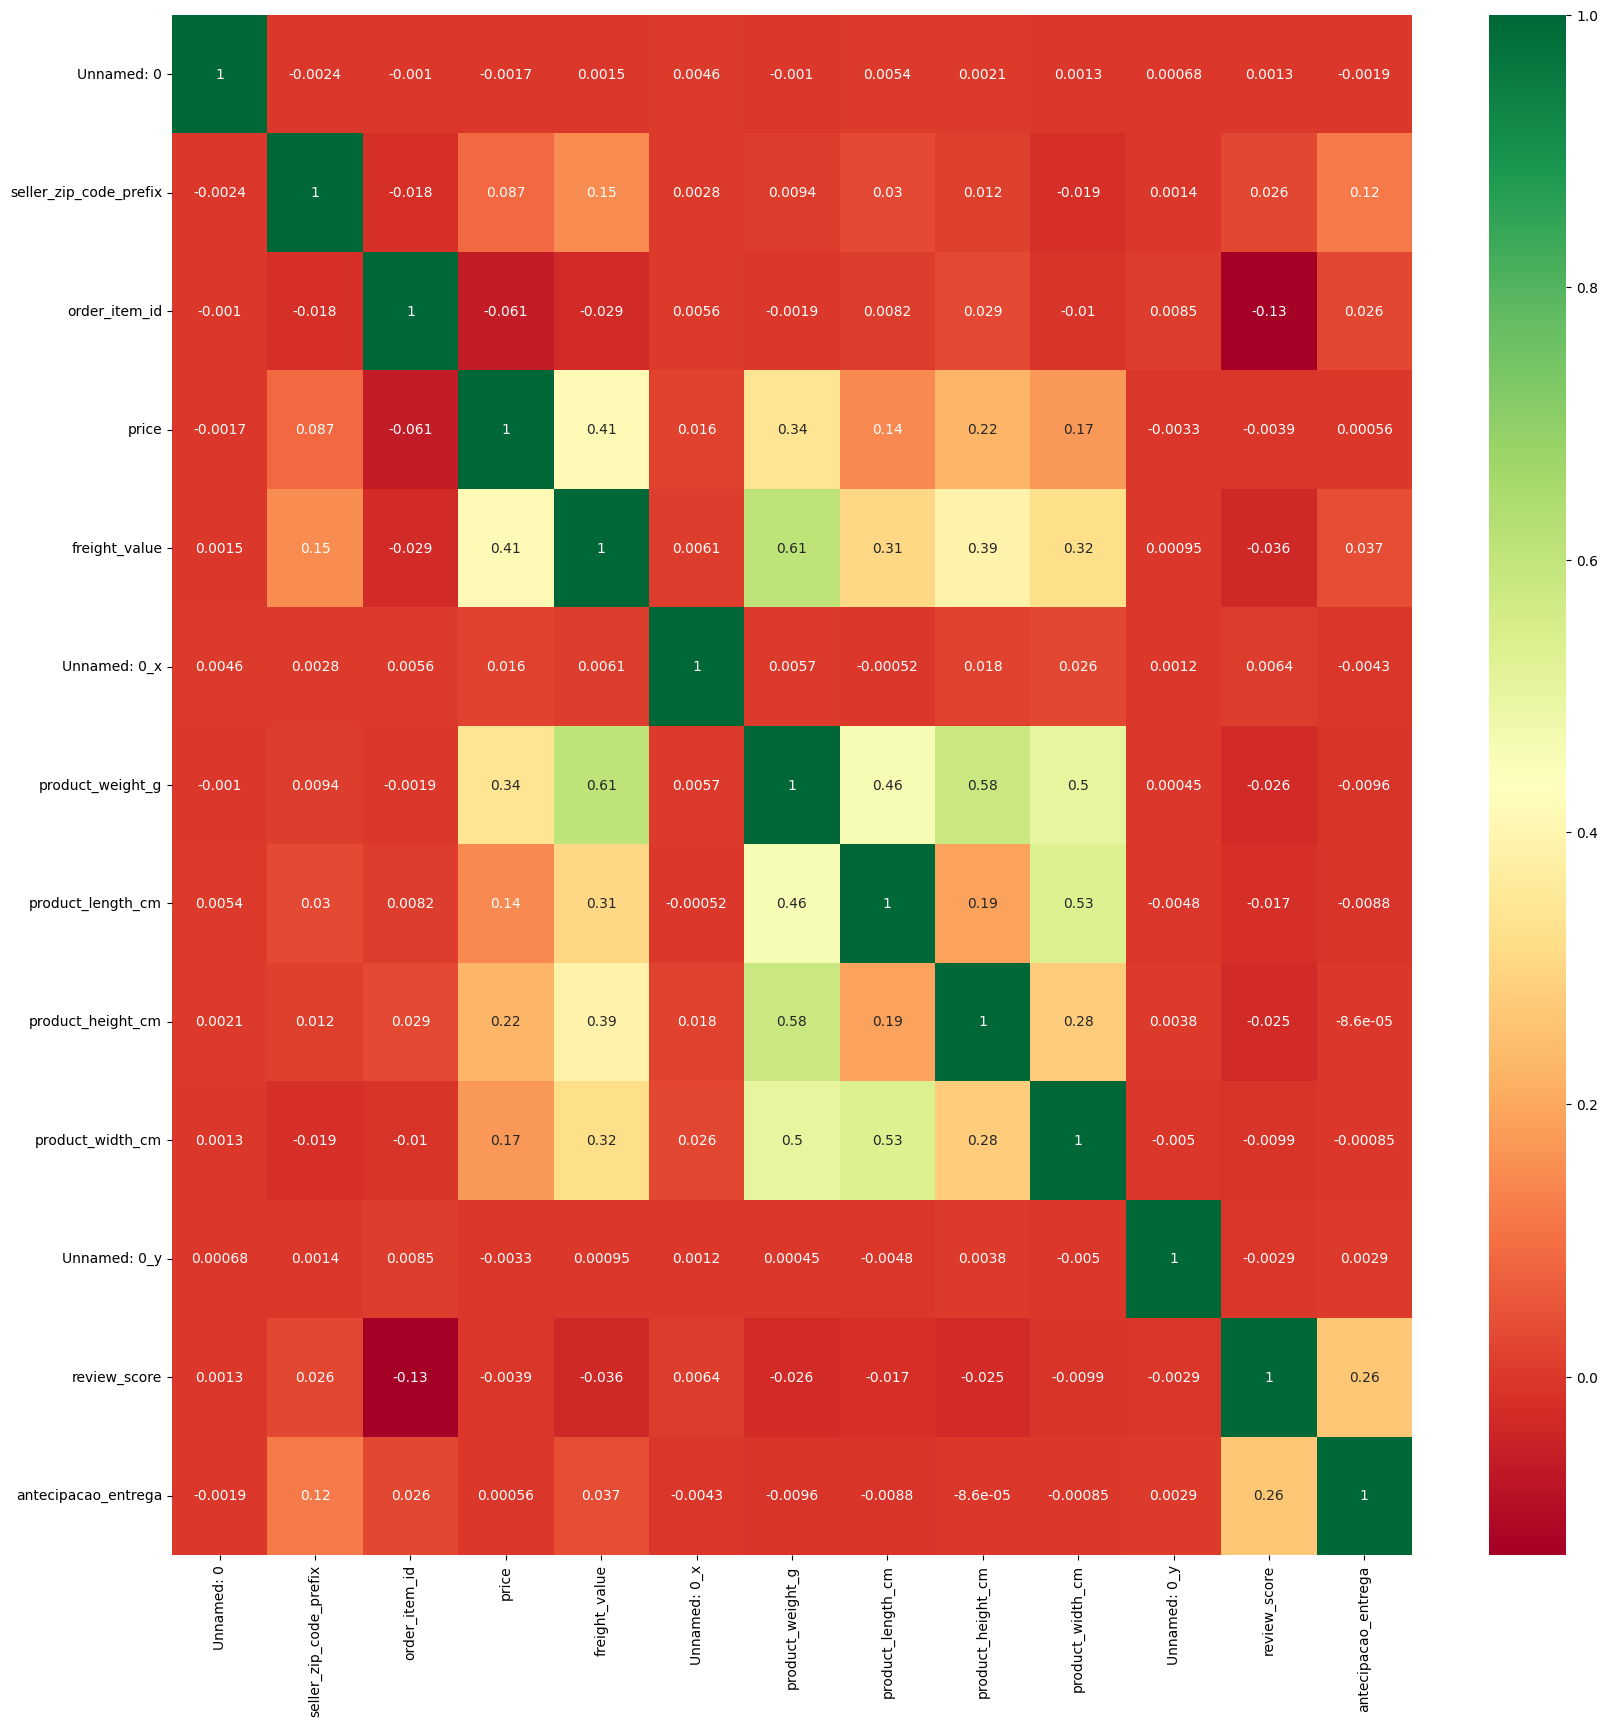

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = df1.corr()
top_corr_features = matriz_corr.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Analisando categoria com score

Filtro para mostrar apenas categorias com mais de 50 avaliações

In [ ]:
avg_score_por_categoria = df1.groupby('product_category_name', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_por_categoria.columns = ['product_category_name', 'count', 'mean']

avg_score_por_categoria = avg_score_por_categoria[avg_score_por_categoria['count'] > 50]
avg_score_por_categoria = avg_score_por_categoria.sort_values(by='mean', ascending=False)
avg_score_por_categoria

## Como as classes se relacionam com as categorias e pontuações de revisão?¶

In [33]:
df1.columns

Index(['Unnamed: 0', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'order_id', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'Unnamed: 0_x',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'Unnamed: 0_y',
       'customer_id_y', 'order_status_y', 'order_purchase_timestamp_y',
       'order_approved_at_y', 'order_delivered_carrier_date_y',
       'order_delivered_customer_date_y', 'order_estimated_delivery_date_y',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'antecipacao_entrega'],
      dtype='object')

## Criando 2 data frame para geolocalização

In [ ]:
geolocal = pd.read_csv("Data/geolocal.csv")

In [ ]:
geolocal.shape

In [ ]:
geolocal.isnull().sum()

In [ ]:
geolocal = df.drop(['geolocation_city', 'geolocation_state'], axis=1)
geolocal = geolocal.drop_duplicates(subset = ['geolocation_zip_code_prefix'],ignore_index=True)

In [ ]:
geo_cliente = geolocal.rename(columns={"geolocation_zip_code_prefix":"customer_zip_code_prefix",
                                                  "geolocation_lat":"customer_lat",
                                                  "geolocation_lng":"customer_lng"})
geo_vendedor = geolocal.rename(columns={"geolocation_zip_code_prefix":"seller_zip_code_prefix",
                                                  "geolocation_lat":"seller_lat",
                                                  "geolocation_lng":"seller_lng"})
geo_cliente.head(3)